# Read data

In [1]:
table <- read.csv("tickets.csv")

In [2]:
Y <- table$tickets
X <- table$year

# Make model

In [3]:
model <- lm(Y~X)

In [4]:
print(summary(model))


Call:
lm(formula = Y ~ X)

Residuals:
      1       2       3       4       5       6       7 
  22649 -106564  -35583  112523   62775   76138 -131938 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -312835300   39203574  -7.980 0.000499 ***
X               156770      19446   8.062 0.000475 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 102900 on 5 degrees of freedom
Multiple R-squared:  0.9286,	Adjusted R-squared:  0.9143 
F-statistic: 64.99 on 1 and 5 DF,  p-value: 0.0004755



# Predict new value with model

In [5]:
predict(model, data.frame(X = 2020))

1 
3839017

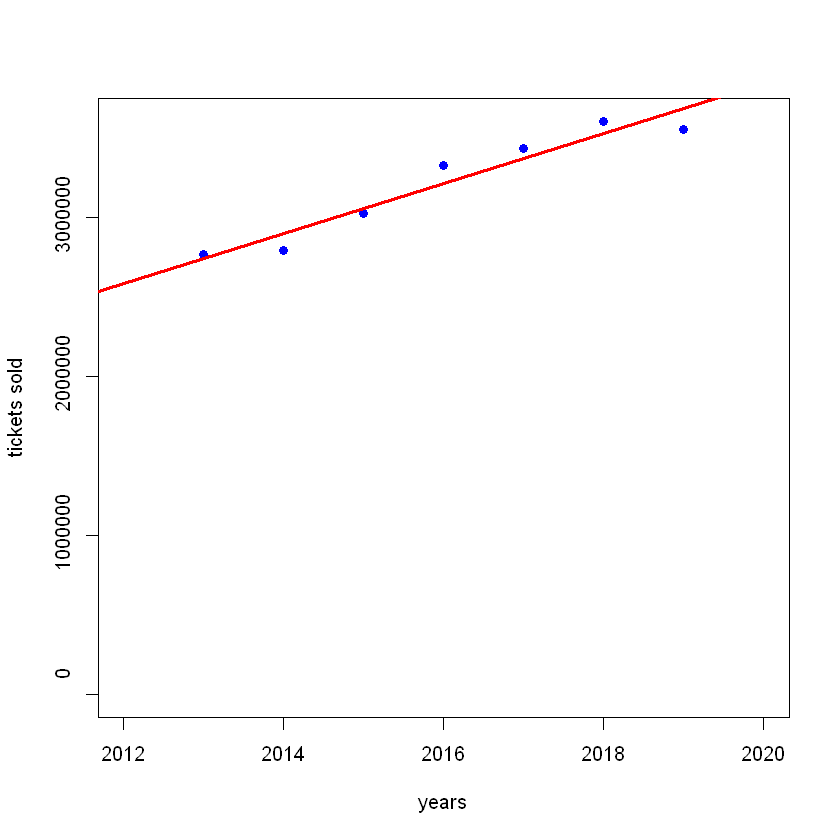

In [6]:
num_digits = ceiling(log10(max(Y)))
label_max = 10 ^ num_digits
label_step = 10 ^ (num_digits-1)
plot(X, Y, col="blue", type="p", pch = 16,
     xlab = "years", ylab = "tickets sold", xlim = c(min(X)-1, max(X)+1), ylim = c(0, max(Y)), yaxt="n")
axis(side = 2, at=seq(0, label_max, label_step), labels=c(format(seq(0, label_max, label_step),scientific=FALSE)))
abline(lm(Y~X), col="red", lwd = 3)

# Same thing by hand

In [7]:
covar <- function(X, Y) {
    n <- length(X)
    dfX <- X - mean(X)
    dfY <- Y - mean(Y)
    return (sum(dfX*dfY) / (n - 1))
}

In [8]:
Sx <- sqrt(covar(X, X))
Sy <- sqrt(covar(Y, Y))
Sxy <- covar(X, Y)

In [9]:
r <- Sxy / (Sx * Sy)
r

[1] 0.9636193

In [10]:
n <- length(X)
T <- (r * sqrt(n-2)) / sqrt(1 - r^2)

In [11]:
pVal <- 1 - max(pt(T, n-2), pt(T, n-2, lower.tail = FALSE))
pVal

[1] 0.0002377296

,so  ρ!=0

determine regression

In [12]:
a <- r * Sy / Sx
b <- mean(Y) - a * mean(X)
a
b

[1] 156769.5

[1] -312835300